In [1]:
from hcrystalball.utils import generate_tsdata
from hcrystalball.wrappers import ProphetWrapper

X, y = generate_tsdata(n_dates=365*2)
X_train, y_train, X_test, y_test = X[:-10], y[:-10], X[-10:], y[-10:]

model = ProphetWrapper()
y_pred = model.fit(X_train,y_train).predict(X_test)

In [2]:
from hcrystalball.utils import generate_multiple_tsdata
from hcrystalball.model_selection import ModelSelector

df = generate_multiple_tsdata(n_dates=200, n_regions=2, n_plants=2, n_products=2)

ms = ModelSelector(horizon=10, frequency="D", country_code_column="Country")
ms.create_gridsearch(n_splits=2, sklearn_models=True, prophet_models=False, exog_cols=["Raining"])
ms.select_model(df=df, target_col_name="Quantity", partition_columns=["Region", "Plant", "Product"])

In [3]:
import ipywidgets as widgets
from IPython.display import display,clear_output
import matplotlib.pyplot as plt

def mk_option_list(inp):
    zw_list={}
    for i in inp.get_partitions()[0].keys():
        zw=[]
        for j in inp.get_partitions():
            zw.append(j[i])
        zw_list.update({ i : set(zw)})
    return zw_list

def mk_dropdown_menue(inp):
    zw=mk_option_list(inp)
    for i in zw.keys():
        exec(str(i)+"=widgets.Dropdown(options="+str(zw[i])+", description='"+str(i)+"')", globals())
        exec("display("+str(i)+")", globals())
        
def recent_choice(inp):
    ll=mk_option_list(inp).keys()
    out=[]
    for i in ll:
        zw=eval(i+".value")
        out.append(zw)
    return out

def display_IRS(inp):
    %matplotlib inline
    %config InlineBackend.close_figures=True
    
    mk_dropdown_menue(inp)
    
    output = widgets.Output()
    button = widgets.Button(description="Show Plot")
    
    display(button,output)
    
    def on_button_clicked(b):
        with output:
            for i in inp.get_partitions():
                if [*i.values()]==recent_choice(inp):
                    inp.get_result_for_partition(i).df_plot.plot()
                else:
                    pass
        clear_output()
        mk_dropdown_menue(inp)
        display(button,output)
            
    button.on_click(on_button_clicked)

In [4]:
display_IRS(ms)

Dropdown(description='Plant', options=('plant_0', 'plant_1'), value='plant_0')

Dropdown(description='Product', options=('product_0', 'product_1'), value='product_0')

Dropdown(description='Region', options=('region_0', 'region_1'), value='region_0')

Button(description='Show Plot', style=ButtonStyle())

Output()

Dropdown(description='Plant', options=('plant_0', 'plant_1'), value='plant_0')

Dropdown(description='Product', options=('product_0', 'product_1'), value='product_0')

Dropdown(description='Region', options=('region_0', 'region_1'), value='region_0')

Button(description='Show Plot', style=ButtonStyle())

Output()

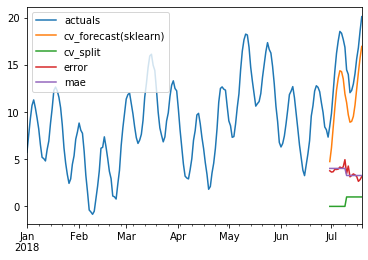

In [5]:
display_IRS(ms)

In [6]:
display_IRS(ms)

Dropdown(description='Plant', options=('plant_0', 'plant_1'), value='plant_0')

Dropdown(description='Product', options=('product_0', 'product_1'), value='product_0')

Dropdown(description='Region', options=('region_0', 'region_1'), value='region_0')

Button(description='Show Plot', style=ButtonStyle())

Output()